In [ ]:
from google.colab import files
upload=files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_data=pd.read_csv("train.csv")

In [ ]:
test_data=pd.read_csv("test.csv")

In [ ]:
train_data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [ ]:
test_data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [ ]:
train_data.drop(["id",'day'],axis=1,inplace=True)

In [ ]:
test_data.drop(["id",'day'],axis=1,inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       2190 non-null   float64
 1   maxtemp        2190 non-null   float64
 2   temparature    2190 non-null   float64
 3   mintemp        2190 non-null   float64
 4   dewpoint       2190 non-null   float64
 5   humidity       2190 non-null   float64
 6   cloud          2190 non-null   float64
 7   sunshine       2190 non-null   float64
 8   winddirection  2190 non-null   float64
 9   windspeed      2190 non-null   float64
 10  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 188.3 KB


In [ ]:
train_data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [ ]:
train_data.isnull().sum()


,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
sunshine,0
winddirection,0
windspeed,0


In [ ]:
train_data.isna().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
sunshine,0
winddirection,0
windspeed,0


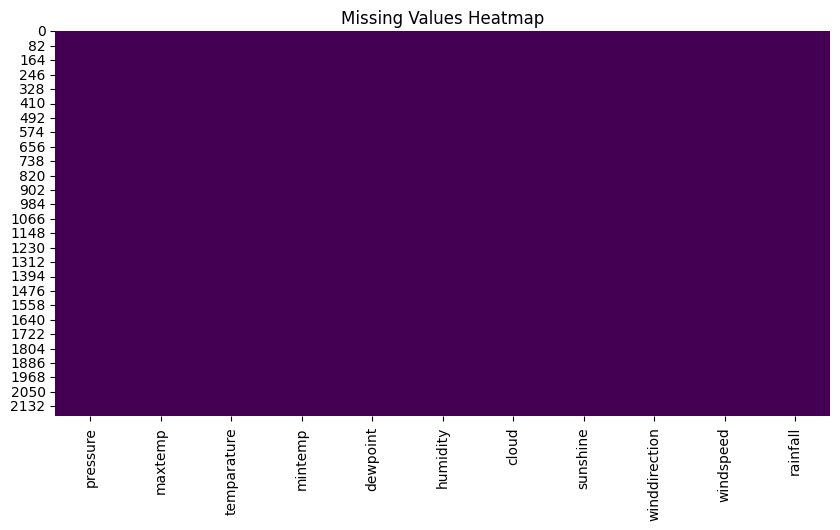

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


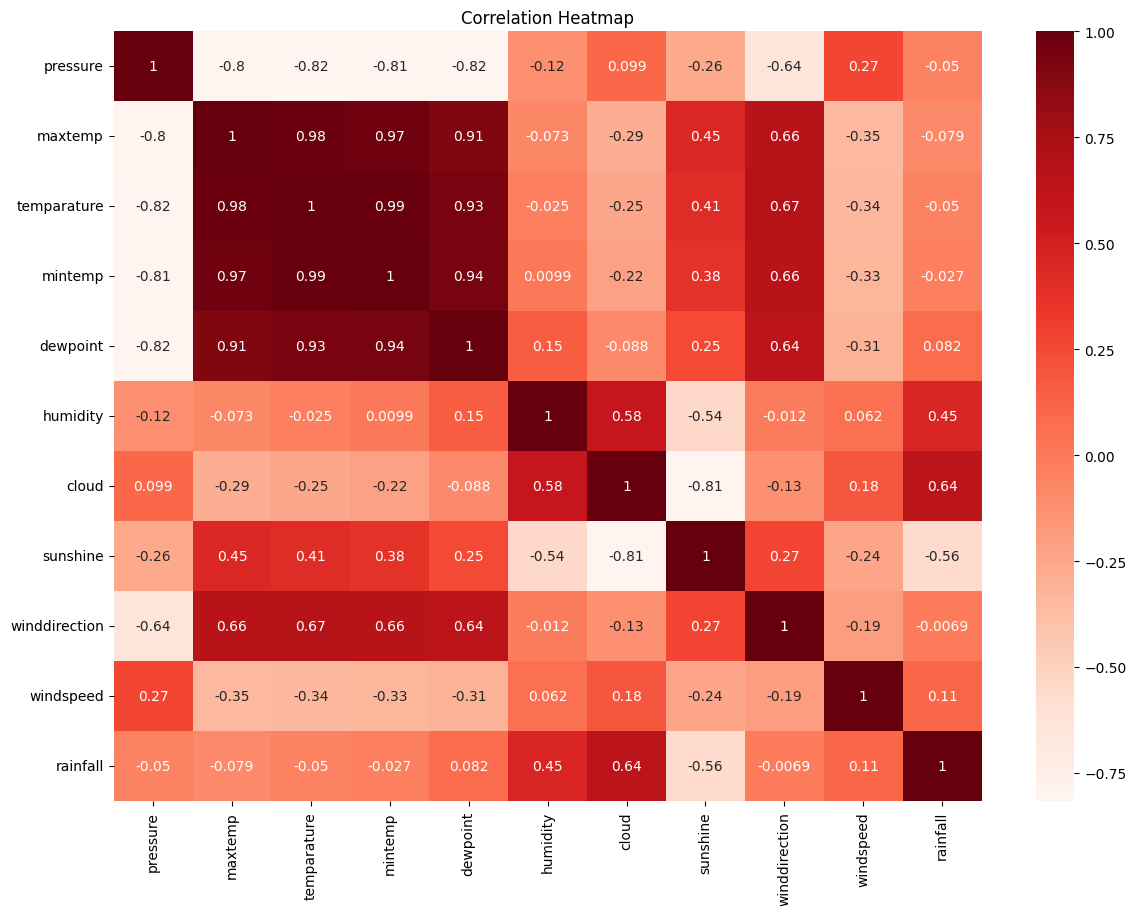

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
sns.heatmap(train_data.corr(), cmap='Reds',annot=True)
plt.title('Correlation Heatmap')
plt.show()

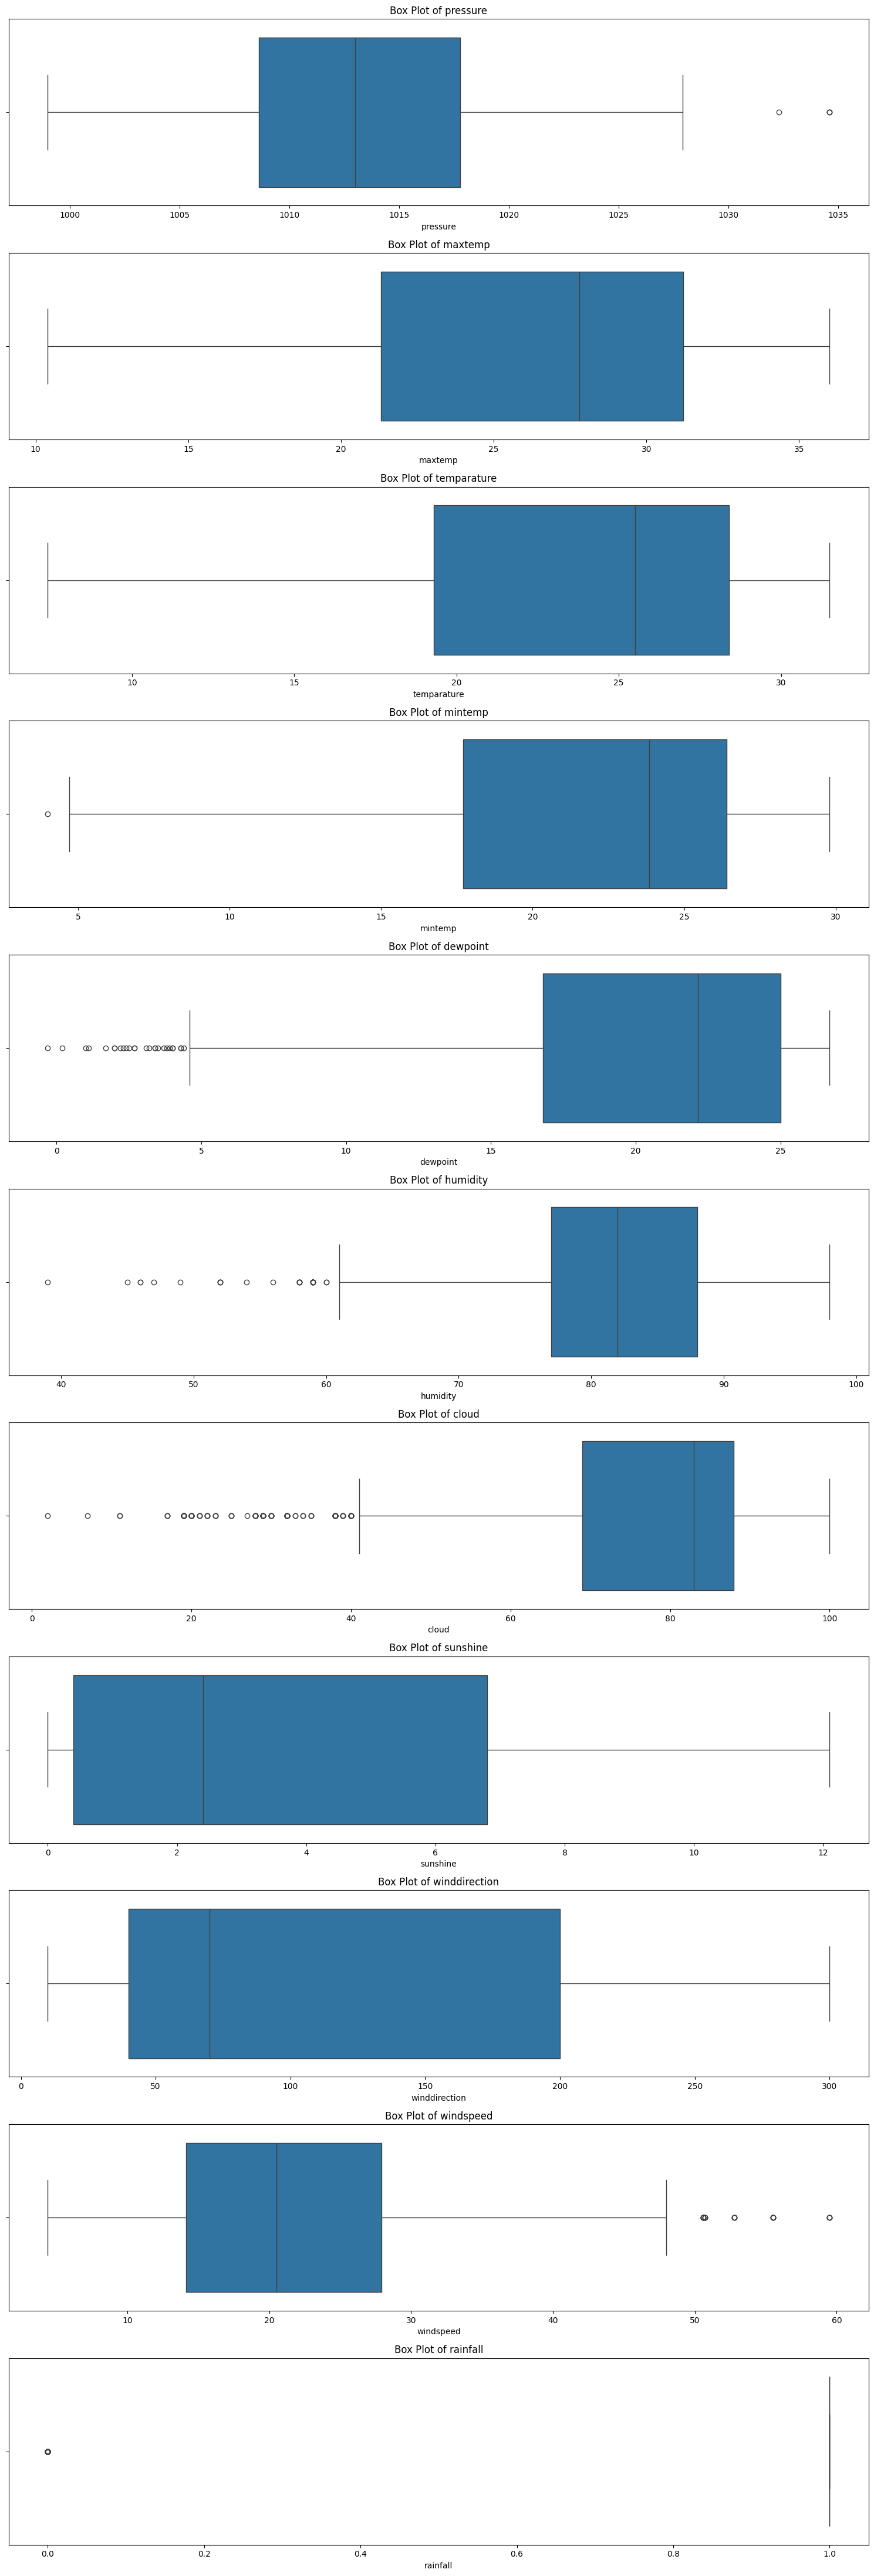

In [ ]:
num_features = len(train_data.columns)
plt.figure(figsize=(15, num_features * 4))  # Adjusting figure size based on number of features

# Loop through each column and create a box plot
for i, column in enumerate(train_data.columns, 1):
    plt.subplot(num_features, 1, i)  # Create a subplot for each feature
    sns.boxplot(x=train_data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


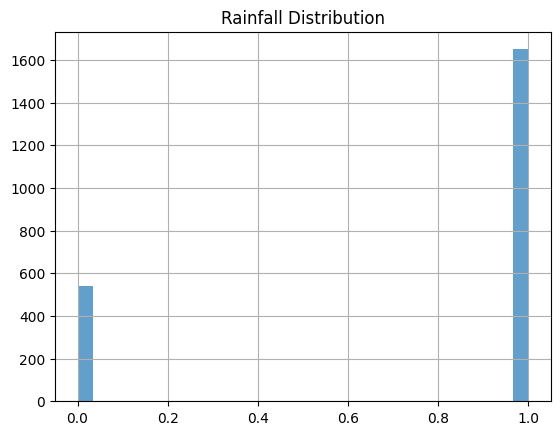

In [ ]:
train_data['rainfall'].hist(bins=30, alpha=0.7)
plt.title("Rainfall Distribution") # Moved title setting outside the hist function
plt.show()

In [ ]:
train_data.corr()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
pressure,1.000000,-0.800499,-0.816531,-0.814453,-0.817008,-0.119949,0.098600,-0.257163,-0.643293,0.266012,-0.049886
maxtemp,-0.800499,1.000000,0.982932,0.965529,0.906703,-0.072615,-0.289047,0.452387,0.662235,-0.354168,-0.079304
temparature,-0.816531,0.982932,1.000000,0.987150,0.933617,-0.025016,-0.249355,0.414019,0.668963,-0.342262,-0.049660
mintemp,-0.814453,0.965529,0.987150,1.000000,0.941342,0.009891,-0.219399,0.379497,0.663828,-0.328871,-0.026841
dewpoint,-0.817008,0.906703,0.933617,0.941342,1.000000,0.153390,-0.088446,0.249676,0.643073,-0.312179,0.081965
humidity,-0.119949,-0.072615,-0.025016,0.009891,0.153390,1.000000,0.584854,-0.541592,-0.012430,0.062285,0.454213
cloud,0.098600,-0.289047,-0.249355,-0.219399,-0.088446,0.584854,1.000000,-0.805128,-0.127087,0.184698,0.641191
sunshine,-0.257163,0.452387,0.414019,0.379497,0.249676,-0.541592,-0.805128,1.000000,0.272235,-0.241752,-0.555287
winddirection,-0.643293,0.662235,0.668963,0.663828,0.643073,-0.012430,-0.127087,0.272235,1.000000,-0.192417,-0.006939
windspeed,0.266012,-0.354168,-0.342262,-0.328871,-0.312179,0.062285,0.184698,-0.241752,-0.192417,1.000000,0.111625


<Axes: title={'center': 'Temperature vs MinTemp'}, xlabel='temparature', ylabel='humidity'>

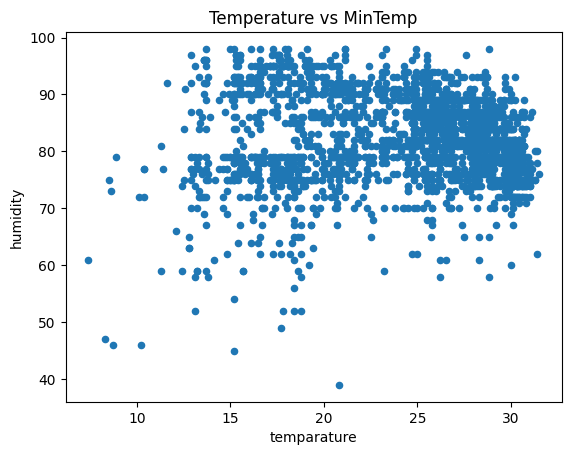

In [ ]:
train_data.plot.scatter(x='temparature', y='humidity', title="Temperature vs MinTemp")


In [ ]:
pip install windrose

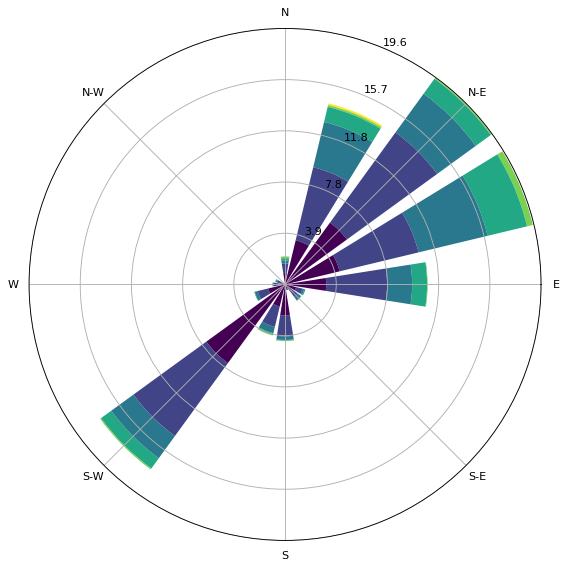

In [ ]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

ax = WindroseAxes.from_ax()
ax.bar(train_data['winddirection'], train_data['windspeed'], normed=True, opening=0.8)
plt.show()


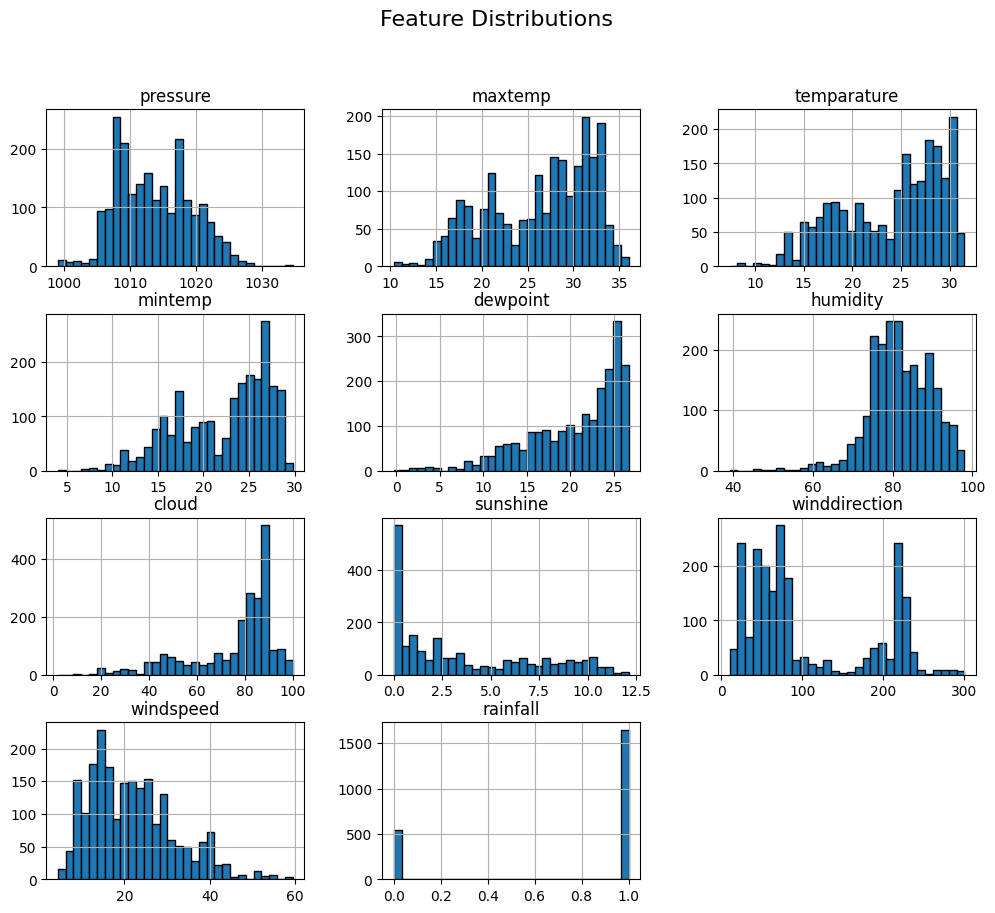

In [ ]:
train_data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


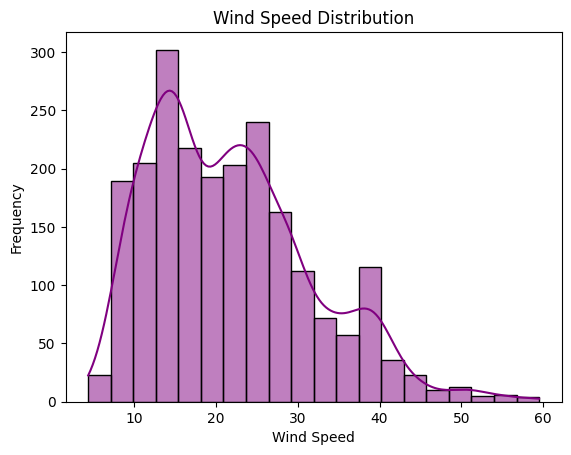

In [ ]:
sns.histplot(train_data['windspeed'], bins=20, kde=True, color='purple')
plt.title("Wind Speed Distribution")
plt.xlabel("Wind Speed")
plt.ylabel("Frequency")
plt.show()


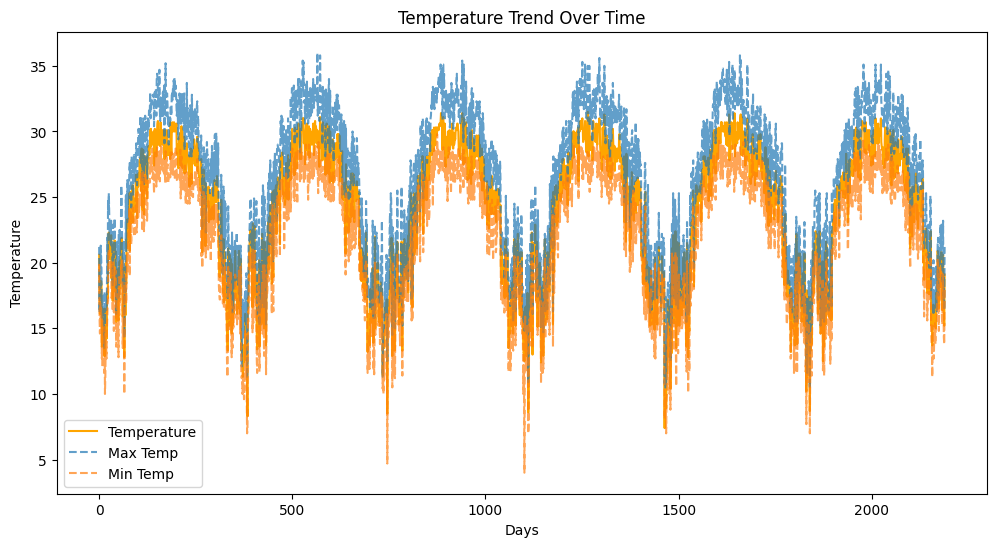

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['temparature'], label="Temperature", color='orange')
plt.plot(train_data['maxtemp'], label="Max Temp", linestyle='dashed', alpha=0.7)
plt.plot(train_data['mintemp'], label="Min Temp", linestyle='dashed', alpha=0.7)
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.title("Temperature Trend Over Time")
plt.legend()
plt.show()


In [ ]:
X = train_data.drop(columns=['rainfall'])  # Modify if predicting a different target
y = train_data['rainfall']  # Target variable


In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Creating a Sequential model
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(16,activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4,activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              44 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,477 (5.77 KB)

 Trainable params: 1,477 (5.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.7698 - loss: 0.5604 - val_accuracy: 0.7374 - val_loss: 0.5443
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7840 - loss: 0.4944 - val_accuracy: 0.7420 - val_loss: 0.5278
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7936 - loss: 0.4738 - val_accuracy: 0.7968 - val_loss: 0.5088
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8127 - loss: 0.4532 - val_accuracy: 0.7466 - val_loss: 0.5392
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7857 - loss: 0.4652 - val_accuracy: 0.8105 - val_loss: 0.4739
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8229 - loss: 0.4301 - val_accuracy: 0.8288 - val_loss: 0.4483
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8413 - loss: 0.4074 - val_accuracy: 0.8333 - val_loss: 0.4630
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8408 - loss: 0.4070 - val_accuracy: 0.8356 - 

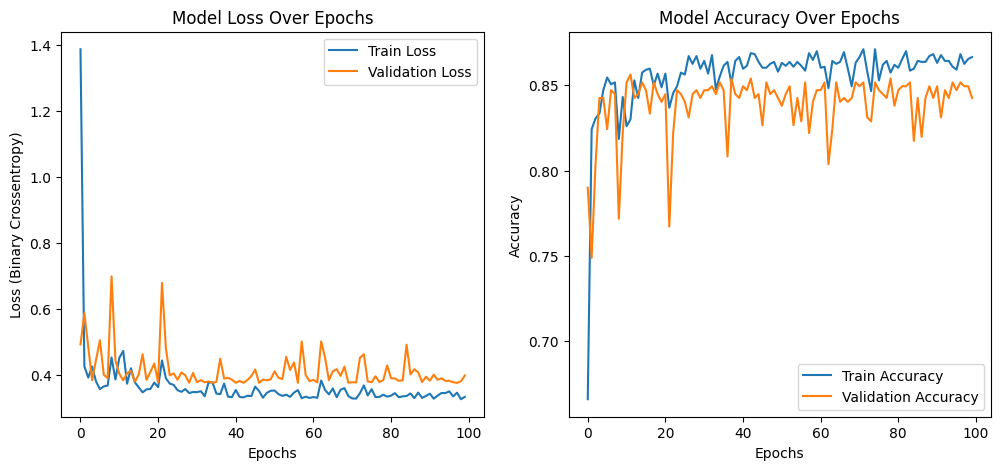

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot loss over epochs
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Crossentropy)')
plt.title('Model Loss Over Epochs')
plt.legend()

# Plot accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()

plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


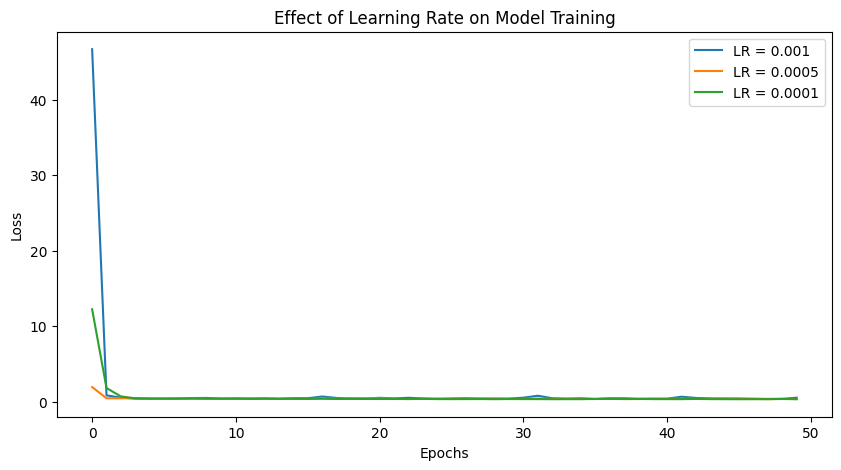

In [ ]:
# Plot Learning Rate Changes Over Time
learning_rates = [0.001, 0.0005, 0.0001]
losses = []

for lr in learning_rates:
    temp_model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    temp_model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy')
    history = temp_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    losses.append(history.history['loss'])

# Plot different learning rates
plt.figure(figsize=(10, 5))
for i, lr in enumerate(learning_rates):
    plt.plot(losses[i], label=f'LR = {lr}')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Effect of Learning Rate on Model Training")
plt.legend()
plt.show()


In [ ]:
# Making predictions on the test data (X_test)
predictions = model.predict(X_test)

# Convert predictions to binary (0 or 1) since it's a classification problem
predictions = (predictions > 0.5).astype(int)  # 0.5 is the threshold for sigmoid output

# Create a DataFrame to display the input values and corresponding predictions
test_data_with_predictions = X_test.copy()  # Get the original test data (without scaling)
test_data_with_predictions['Predicted Rainfall'] = predictions

# Optionally, you can also add the actual labels to compare predictions with true labels
test_data_with_predictions['Actual Rainfall'] = y_test.reset_index(drop=True)

# Display the input values and predicted labels
test_data_with_predictions.head(15)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,Predicted Rainfall,Actual Rainfall
289,1014.9,26.3,23.3,20.1,17.4,75.0,83.0,3.0,40.0,22.0,1,1.0
1692,1009.5,31.0,29.8,28.2,24.5,78.0,78.0,7.7,220.0,26.4,1,NaN
1590,1012.2,31.9,29.9,28.3,24.9,75.0,72.0,8.4,180.0,8.0,1,NaN
383,1034.6,11.2,10.4,7.0,3.4,77.0,95.0,0.0,40.0,16.0,1,1.0
1818,1017.5,17.5,16.4,15.8,15.9,85.0,91.0,1.5,50.0,19.0,1,NaN
781,1018.4,18.4,17.5,15.0,16.5,93.0,96.0,0.0,60.0,38.0,1,NaN
96,1008.6,29.1,26.6,25.4,24.2,93.0,85.0,0.9,220.0,19.0,1,1.0
422,1012.0,25.2,22.2,18.4,17.8,81.0,83.0,0.7,30.0,23.7,1,0.0
1747,1014.1,28.2,24.1,22.5,20.8,83.0,71.0,6.8,90.0,22.0,1,NaN
1120,1013.9,24.6,22.3,20.7,19.9,91.0,82.0,0.0,80.0,27.4,1,NaN


In [ ]:
import numpy as np
import pandas as pd

# Convert NumPy array to DataFrame and save
df_test = pd.DataFrame(test_data_with_predictions)
df_test.to_csv('test_data.csv', index=False)
